## Model with Bayesian Optimization

Bayesian optimization uses probability to find the minimum of a function. The final aim is to find the input value to a function which can gives us the lowest possible output value.

In Hyperopt, Bayesian Optimization can be implemented giving 3 three main parameters to the function

Objective Function = Defines the loss function to minimize.

Domain Space = Defines the range of input values to test

Optimization Algorithm = Defines the search algorithm to use to select the best input values to use in each new iteration.

In [ ]:
import hyperopt


In [ ]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials


In [ ]:
from google.colab import files


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1Blpp94I9dOaMt7V4nB-0meR4FygacAwN'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Real_combine.csv') 

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('Real_combine.csv')

In [ ]:
df

,Unnamed: 0,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,1,26.7,33.0,20.0,1012.4,60.0,5.1,4.4,13.0,284.795833
1,3,29.1,35.0,20.5,1011.9,49.0,5.8,5.2,14.8,219.720833
2,5,28.4,36.0,21.0,1011.3,46.0,5.3,5.7,11.1,182.187500
3,7,25.9,32.0,20.0,1011.8,56.0,6.1,6.9,11.1,154.037500
4,9,24.8,31.1,20.6,1013.6,58.0,4.8,8.3,11.1,223.208333
...,...,...,...,...,...,...,...,...,...,...
638,1277,28.5,33.4,20.9,1012.6,59.0,5.3,6.3,14.8,185.500000
639,1279,24.9,33.2,14.8,1011.5,48.0,4.2,4.6,13.0,166.875000
640,1281,26.4,32.0,20.9,1011.2,70.0,3.9,6.7,9.4,200.333333
641,1283,20.8,25.0,14.5,1016.8,78.0,4.7,5.9,11.1,349.291667


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,26.7,33.0,20.0,1012.4,60.0,5.1,4.4,13.0,284.795833
1,29.1,35.0,20.5,1011.9,49.0,5.8,5.2,14.8,219.720833
2,28.4,36.0,21.0,1011.3,46.0,5.3,5.7,11.1,182.187500
3,25.9,32.0,20.0,1011.8,56.0,6.1,6.9,11.1,154.037500
4,24.8,31.1,20.6,1013.6,58.0,4.8,8.3,11.1,223.208333
...,...,...,...,...,...,...,...,...,...
638,28.5,33.4,20.9,1012.6,59.0,5.3,6.3,14.8,185.500000
639,24.9,33.2,14.8,1011.5,48.0,4.2,4.6,13.0,166.875000
640,26.4,32.0,20.9,1011.2,70.0,3.9,6.7,9.4,200.333333
641,20.8,25.0,14.5,1016.8,78.0,4.7,5.9,11.1,349.291667


In [ ]:
X=df.iloc[:,:-1]

In [ ]:
y=df.iloc[:,-1]

In [ ]:
#### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
X_train

,T,TM,Tm,SLP,H,VV,V,VM
261,27.7,33.1,23.0,1005.8,68.0,5.5,8.3,22.2
470,25.8,32.5,20.0,1012.6,60.0,4.5,6.1,11.1
612,27.7,32.8,21.0,1013.1,66.0,4.7,5.4,13.0
552,23.2,31.0,12.9,1013.3,41.0,4.0,3.0,9.4
12,25.2,31.0,19.0,1015.4,48.0,4.7,11.1,16.5
...,...,...,...,...,...,...,...,...
9,23.7,30.4,17.0,1015.8,46.0,5.1,5.2,14.8
359,33.6,40.0,25.0,1006.9,36.0,5.8,6.1,11.1
192,24.9,30.4,19.0,1008.9,57.0,4.8,4.6,9.4
629,26.1,29.0,22.4,1001.2,87.0,5.0,14.1,22.2


In [ ]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# Hyperparameters range ===> Domain space

parameters = {'criterion': hp.choice('criterion', ['mse', 'mae']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
    }

In [ ]:
# Objective function 

def objective(parameters):
    model = RandomForestRegressor(criterion = parameters['criterion'], max_depth = parameters['max_depth'],
                                 max_features = parameters['max_features'],
                                 min_samples_leaf = parameters['min_samples_leaf'],
                                 min_samples_split = parameters['min_samples_split'],
                                 n_estimators = parameters['n_estimators'], 
                                 )
    
    performance= cross_val_score(model, df.iloc[:,:-1], df.iloc[:,-1], cv = 5).mean()

    # We aim to maximize performance of model, therefore we return it as a negative value
    return {'loss': -performance, 'status': STATUS_OK }

In [ ]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,space=parameters,algo= tpe.suggest,max_evals = 80,trials= trials)

100%|██████████| 80/80 [12:05<00:00,  9.07s/it, best loss: -0.45233420634261867]


In [ ]:
best['criterion']

1

Hyperopt Fmin returns index values which are given in Domain space

To get actual parameters we create a dictonary to map index values to parameters

In [ ]:

crit = {0: 'mse', 1: 'mae'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200,5:1300,6:1500}


print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

mae
log2
750


In [ ]:

trainedforest = RandomForestRegressor(criterion = crit[best['criterion']], max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]).fit(X_train,y_train)

In [ ]:
y_prediction=trainedforest.predict(X_test)

In [ ]:
# performance of hyperparameter tuned model
import sklearn


In [ ]:
from sklearn import metrics

In [ ]:
sklearn.metrics.mean_squared_error(y_test,y_prediction)

3745.1700713812247

In [ ]:
from hyperopt import plotting

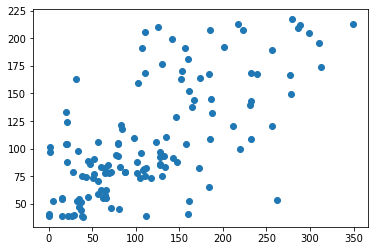

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_prediction)
